In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('train_prompts_outputs.csv')

In [5]:
df.shape

(7564, 7)

In [6]:
df_invalid_output = df[(df['inclusion_criteria_output'] == '"{}"') | (df['exclusion_criteria_output'] == '"{}"')]

In [7]:
df_invalid_output.shape

(78, 7)

In [8]:
df_valid_output = df[(df['inclusion_criteria_output'] != '"{}"') & (df['exclusion_criteria_output'] != '"{}"')]

In [9]:
df_valid_output.shape

(7486, 7)

In [10]:
import json

In [11]:
def verify_json_conditions(input_data):
    data = json.loads(input_data)
    json_data = json.loads(data)

    for key, value in json_data.items():
        array = value[1]
        label = value[2]
        if label == "met" or label == "not met":
            if not array:
                return False
        elif label == 'no relevant information':
            if array:
                return False
    
    return True


In [12]:
df_invalid_json_conditions = df_valid_output[(df_valid_output["inclusion_criteria_output"].apply(verify_json_conditions) == False) | (df_valid_output["exclusion_criteria_output"].apply(verify_json_conditions) == False)]

In [13]:
df_invalid_json_conditions.shape

(5184, 7)

In [14]:
df_valid_json_conditions = df_valid_output[~((df_valid_output["inclusion_criteria_output"].apply(verify_json_conditions) == False) | (df_valid_output["exclusion_criteria_output"].apply(verify_json_conditions) == False))]

In [15]:
df_valid_json_conditions.shape

(2302, 7)

In [74]:
df_invalid_output.to_csv('invalid_data.csv', index = False)

In [16]:
df.sample(10)

,inclusion_criteria_system_prompt,exclusion_criteria_system_prompt,incl_prompt,excl_prompt,inclusion_criteria_output,exclusion_criteria_output,relevance
6131,\nYou are a helpful assistant for matching pat...,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. A 46-year-old ...,\nHere is the patient note:\n1. A 46-year-old ...,"""{\n \""inclusion_criterion_1\"": [\""The pati...","""{\n \""exclusion_criterion_1\"": [\""The pati...",0
2009,\nYou are a helpful assistant for matching pat...,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""The pati...","""{\n \""exclusion_criterion_1\"": [\""Patients...",0
2674,\nYou are a helpful assistant for matching pat...,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""The pati...","""{\n \""exclusion_criterion_1\"": [\""The pati...",0
2286,\nYou are a helpful assistant for matching pat...,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""The pati...","""{\n\""exclusion_criterion_1\"": [\""The patient'...",1
5273,\nYou are a helpful assistant for matching pat...,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""The patien...","""{\n \""exclusion_criterion_1\"": [\""The pati...",1
774,\nYou are a helpful assistant for matching pat...,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. 79 yo F with m...,\nHere is the patient note:\n1. 79 yo F with m...,"""{\n \""inclusion_criterion_1\"": [\""The pati...","""{\n \""exclusion_criterion_1\"": [\""The pati...",1
3535,\nYou are a helpful assistant for matching pat...,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. This is a 44 y...,\nHere is the patient note:\n1. This is a 44 y...,"""{\n \""inclusion_criterion_1\"": [\""The pati...","""{\n \""exclusion_criterion_1\"": [\""The pati...",0
2354,\nYou are a helpful assistant for matching pat...,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. A 32 yo woman ...,\nHere is the patient note:\n1. A 32 yo woman ...,"""{\n \""inclusion_criterion_1\"": [\""The pati...","""{\n \""exclusion_criterion_1\"": [\""The pati...",2
5107,\nYou are a helpful assistant for matching pat...,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""The pati...","""{\n \""exclusion_criterion_1\"": [\""The pati...",1
6010,\nYou are a helpful assistant for matching pat...,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. A 46-year-old ...,\nHere is the patient note:\n1. A 46-year-old ...,"""{\n \""inclusion_criterion_1\"": [\""The pati...","""{\n \""exclusion_criterion_1\"": [\""The pati...",1


In [17]:
df_valid_json_conditions['relevance'].value_counts()

relevance
2    941
1    751
0    610
Name: count, dtype: int64

In [18]:
df = pd.DataFrame(df_valid_json_conditions)

In [20]:
df_incl_crit_instructions = pd.DataFrame()
df_excl_crit_instructions = pd.DataFrame()

df_incl_crit_instructions[['system', 'user', 'assistant']] = df[['inclusion_criteria_system_prompt', 'incl_prompt', 'inclusion_criteria_output']]
df_excl_crit_instructions[['system', 'user', 'assistant']] = df[['exclusion_criteria_system_prompt', 'excl_prompt', 'exclusion_criteria_output']]

In [21]:
df_incl = pd.DataFrame(df_incl_crit_instructions)

df_incl['text_length'] = df_incl[['system', 'user', 'assistant']].apply(lambda x: x.str.len().sum(), axis=1)

df_incl['length_bin'] = pd.cut(df_incl['text_length'], bins=4)

In [22]:
df_incl['length_bin'].value_counts()

length_bin
(3553.75, 4462.5]      1180
(2641.365, 3553.75]     786
(4462.5, 5371.25]       314
(5371.25, 6280.0]        22
Name: count, dtype: int64

In [23]:
df_excl = pd.DataFrame(df_excl_crit_instructions)

df_excl['text_length'] = df_excl[['system', 'user', 'assistant']].apply(lambda x: x.str.len().sum(), axis=1)

df_excl['length_bin'] = pd.cut(df_excl['text_length'], bins=4)

In [24]:
df_excl['length_bin'].value_counts()

length_bin
(2675.129, 3897.75]    1078
(3897.75, 5115.5]       977
(5115.5, 6333.25]       235
(6333.25, 7551.0]        12
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt

def plot_length_distribution(dataframe, column_name):
    hist_data = dataframe[column_name].value_counts()

    plt.figure(figsize=(4, 4))
    plt.pie(hist_data, labels=hist_data.index.astype(str), autopct='%1.1f%%', startangle=140)
    
    plt.title('Length distribution')
    
    plt.show()

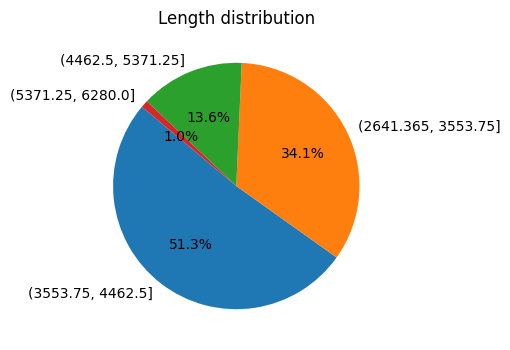

In [26]:
plot_length_distribution(df_incl, 'length_bin')

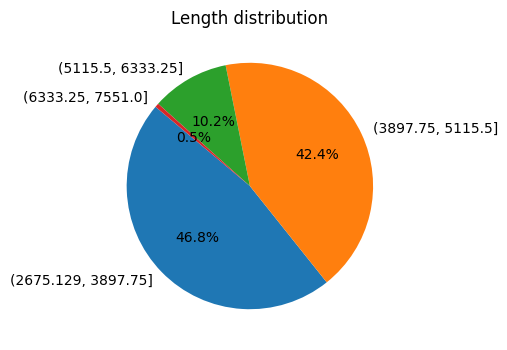

In [27]:
plot_length_distribution(df_excl, 'length_bin')

In [28]:
from sklearn.model_selection import train_test_split

train_incl_set, train_incl_sample_set = train_test_split(df_incl, test_size=0.212, stratify=df_incl['length_bin'], random_state=42)

train_excl_set, train_excl_sample_set = train_test_split(df_excl, test_size=0.212, stratify=df_excl['length_bin'], random_state=42)

In [29]:
train_incl_sample_set.shape

(489, 5)

In [30]:
train_excl_sample_set.shape

(489, 5)

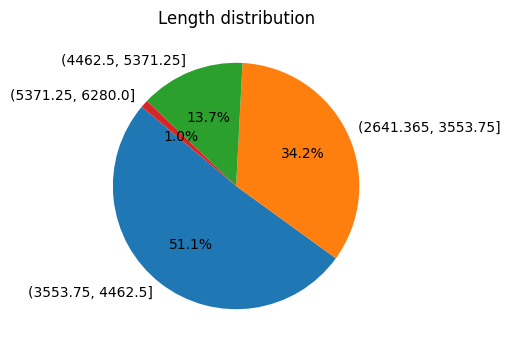

In [31]:
plot_length_distribution(train_incl_sample_set, 'length_bin')

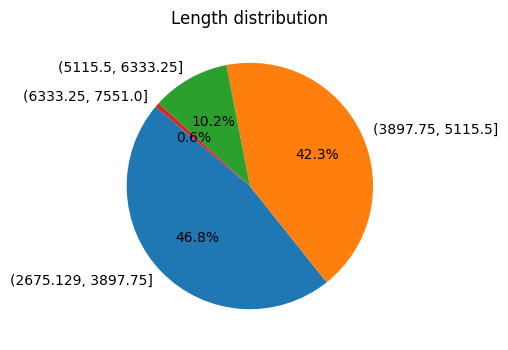

In [32]:
plot_length_distribution(train_excl_sample_set, 'length_bin')

In [33]:
train_incl_sample_set.drop(columns=['text_length', 'length_bin'], inplace=True)
train_excl_sample_set.drop(columns=['text_length', 'length_bin'], inplace=True)

In [34]:
df_train_merged = pd.concat([train_incl_sample_set, train_excl_sample_set], axis=0)

In [35]:
df_train_merged.shape

(978, 3)

In [36]:
df_train_merged.sample(10)

,system,user,assistant
2233,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
4185,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. A 62-year-old ...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
6499,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. 60 yo M with H...,"""{\n \""exclusion_criterion_1\"": [\n ..."
4430,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. A 12 year old ...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
5328,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
2561,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
6614,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. 60 yo M with H...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
357,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. 70 y/o with CO...,"""{\n \""inclusion_criterion_1\"": [\""Patient me..."
3970,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
6804,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""Patient ..."


In [235]:
df_processed = pd.read_csv('processed_output.csv')

In [236]:
df_processed.sample(10)

,system,user,assistant
18,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. The patient is a...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
23,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. Patient is a 55y...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
14,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. The patient is a...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
10,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. The patient is a...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
15,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. The patient is a...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
13,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. The patient is a...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
9,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. The patient is a...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
5,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. The patient is a...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
25,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. The patient is a...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
0,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. A 39-year-old ma...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."


In [283]:
df_train_merged = pd.concat([df_train_merged, df_processed], axis=0)

In [284]:
df_train_merged.sample(10)

,system,user,assistant
5743,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
6427,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. A 16-year-old ...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
918,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. 64yo woman wit...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
4647,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patients i...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
4,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. The patient is a...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
7370,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. This is a 57-y...,"""{\n \""exclusion_criterion_1\"": [\""The pati..."
3451,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. A 3-day-old As...,"""{\n \""inclusion_criterion_1\"": [\""The pati..."
910,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. 64yo woman wit...,"""{\n \""exclusion_criterion_1\"": [\""The pati..."
246,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. 70 y/o with CO...,"""{\n\""exclusion_criterion_1\"": [\""Patient is n..."
6529,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. 60 yo M with H...,"""{\n \""exclusion_criterion_1\"": [\""The pati..."


In [285]:
df_train_merged['assistant'] = df_train_merged['assistant'].apply(json.loads)

In [286]:
df_train_merged

,system,user,assistant
3374,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"{\n ""inclusion_criterion_1"": [""The patient ..."
3737,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"{\n ""inclusion_criterion_1"": [""The patient ..."
2177,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"{\n""inclusion_criterion_1"": [""The patient is 2..."
2291,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"{\n ""inclusion_criterion_1"": [""The patient ..."
1661,\nYou are a helpful assistant for matching pat...,\nHere is the patient note:\n1. The patient is...,"{\n ""inclusion_criterion_1"": [""The patient ..."
...,...,...,...
21,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. Patient is a 55y...,"{\n ""inclusion_criterion_1"": [""The patient ..."
22,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. Patient is a 55y...,"{\n ""inclusion_criterion_1"": [""The patient ..."
23,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. Patient is a 55y...,"{\n ""inclusion_criterion_1"": [""The patient ..."
24,\nYou are a helpful assistant for matching pat...,Here is the patient note:\n1. The patient is a...,"{\n ""inclusion_criterion_1"": [""The patient'..."


In [287]:
df_train_merged_shuffled = df_train_merged.sample(frac=1).reset_index(drop=True)

In [288]:
def get_prompt(system_content, user_content, assistant_content):
    template = {
        "messages": [
            {"role": "system", "content": system_content},
            {"role": "user", "content": user_content},
            {"role": "assistant", "content": assistant_content}
        ]
    }
    
    return template

In [289]:
def to_jsonl(file_path, prompts):
    with open(file_path, 'w') as file:
        for prompt in prompts:
            json.dump(prompt, file)
            file.write('\n')

In [290]:
prompts_list = df_train_merged_shuffled.apply(lambda row: get_prompt(row['system'], row['user'], row['assistant']), axis=1)

In [291]:
prompts_list.shape

(1004,)

In [292]:
file_path = "train_data_gpt_2.jsonl"

to_jsonl(file_path, prompts_list)